<font size=5>Optimization Methods——使用梯度下降法来学习更先进的优化方法

In [72]:
import numpy as np  # 导入NumPy库，用于科学计算
import matplotlib.pyplot as plt  # 导入Matplotlib库，用于绘图
import scipy.io  # 导入SciPy库，用于读取MATLAB文件
import math  # 导入Math库，用于数学计算
import sklearn  # 导入Scikit-learn库，用于机器学习算法
import sklearn.datasets  # 导入Scikit-learn的数据集模块

 # 导入自定义的优化器工具函数
from opt_utils import load_params_and_grads, initialize_parameters, forward_propagation, backward_propagation 
from opt_utils import compute_cost, predict, predict_dec, plot_decision_boundary, load_dataset
from testCases import *

# 魔法命令，用于在Jupyter Notebook中显示绘图结果
%matplotlib inline  
plt.rcParams['figure.figsize'] = (7.0, 4.0)  # 设置绘图的默认尺寸
plt.rcParams['image.interpolation'] = 'nearest'  # 设置图像插值方式为最近邻插值
plt.rcParams['image.cmap'] = 'gray'  # 设置图像色彩映射为灰度


In [73]:
def update_parameters_with_gd(parameters, grads, learning_rate):
    """
    使用一步梯度下降更新参数
    
     参数：
     parameters -- 包含要更新的参数的 python 字典：
                     参数['W' + str(l)] = Wl
                     参数['b' + str(l)] = bl
     grads——包含你的渐变的 python 字典来更新每个参数：
                     grads['dW' + str(l)] = dWl
                     grads['db' + str(l)] = dbl
     learning_rate -- 学习率，标量。
    
     退货：
     parameters -- 包含更新参数的 python 字典
    """

    L = len(parameters) // 2  # 网络层数

    for i in range(L):
        # 更新参数
        parameters["W" + str(i + 1)] -= learning_rate * grads["dW" + str(i + 1)]
        parameters["b" + str(i + 1)] -= learning_rate * grads["db" + str(i + 1)]
        
    return parameters


In [74]:
# 加载测试用例中的初始参数、梯度和学习率
parameters, grads, learning_rate = update_parameters_with_gd_test_case()

# 使用梯度下降更新参数
parameters = update_parameters_with_gd(parameters, grads, learning_rate)

# 打印更新后的参数
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 1.63535156 -0.62320365 -0.53718766]
 [-1.07799357  0.85639907 -2.29470142]]
b1 = [[ 1.74604067]
 [-0.75184921]]
W2 = [[ 0.32171798 -0.25467393  1.46902454]
 [-2.05617317 -0.31554548 -0.3756023 ]
 [ 1.1404819  -1.09976462 -0.1612551 ]]
b2 = [[-0.88020257]
 [ 0.02561572]
 [ 0.57539477]]


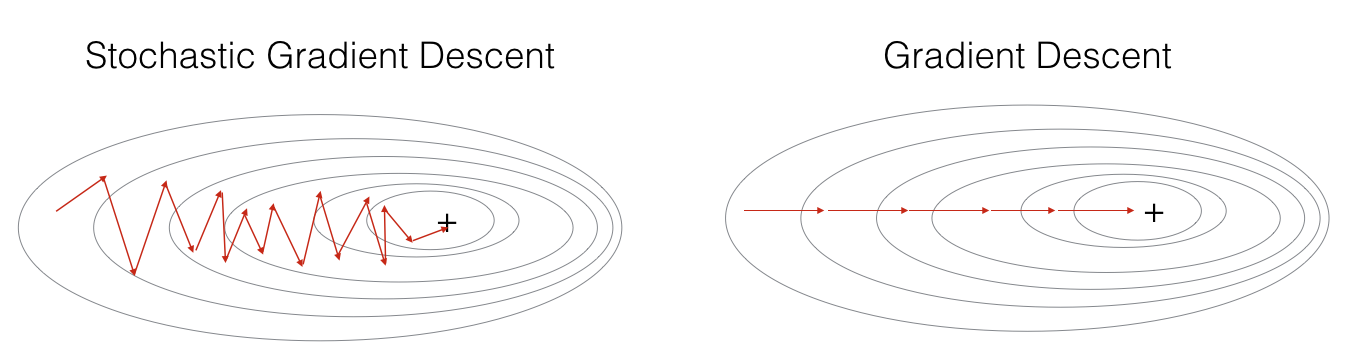

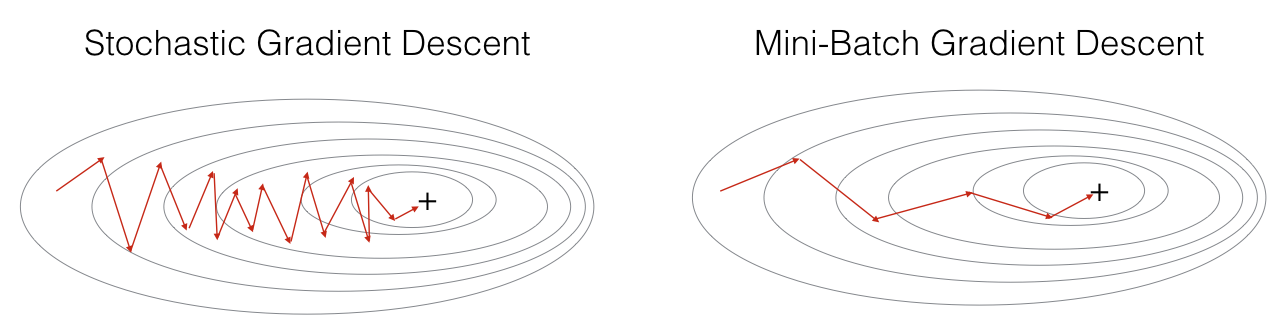

In [75]:
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    从 (X, Y) 创建一个随机小批量列表
    
     参数：
     X -- 输入数据，形状（输入大小，示例数）
     Y -- 真正的“标签”向量（蓝点为 1 / 红点为 0），形状为（1，示例数）
     mini_batch_size -- 小批量的大小，整数
    
     退货：
     mini_batches -- 同步列表 (mini_batch_X, mini_batch_Y)
    """
    
    np.random.seed(seed)  # 设置随机种子，以确保结果可复现
    m = X.shape[1]  # 样本数量
    mini_batches = []  # 用于存储小批量样本的列表

    # 随机打乱样本的顺序
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((1, m))

    # 计算完整的小批量样本的数量
    num_complete_minibatches = math.floor(m / mini_batch_size)
    for k in range(0, num_complete_minibatches):
        # 提取一个完整的小批量样本
        mini_batch_X = shuffled_X[:, k * mini_batch_size: (k + 1) * mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size: (k + 1) * mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    # 如果样本数不能整除小批量大小，则提取剩余的部分作为一个小批量样本
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size: m]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size: m]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    return mini_batches


In [76]:
# 加载测试用例中的初始X,Y参数,批处理大小
X_assess, Y_assess, mini_batch_size = random_mini_batches_test_case()
#调用参数得到mini_batches
mini_batches = random_mini_batches(X_assess, Y_assess, mini_batch_size)
# 打印数据形状
print ("shape of the 1st mini_batch_X: " + str(mini_batches[0][0].shape))
print ("shape of the 2nd mini_batch_X: " + str(mini_batches[1][0].shape))
print ("shape of the 3rd mini_batch_X: " + str(mini_batches[2][0].shape))
print ("shape of the 1st mini_batch_Y: " + str(mini_batches[0][1].shape))
print ("shape of the 2nd mini_batch_Y: " + str(mini_batches[1][1].shape)) 
print ("shape of the 3rd mini_batch_Y: " + str(mini_batches[2][1].shape))
# 打印第一批数据的前三个元素
print ("mini batch sanity check: " + str(mini_batches[0][0][0][0:3]))

shape of the 1st mini_batch_X: (12288, 64)
shape of the 2nd mini_batch_X: (12288, 64)
shape of the 3rd mini_batch_X: (12288, 20)
shape of the 1st mini_batch_Y: (1, 64)
shape of the 2nd mini_batch_Y: (1, 64)
shape of the 3rd mini_batch_Y: (1, 20)
mini batch sanity check: [ 0.90085595 -0.7612069   0.2344157 ]


In [77]:
# 初始化速度
def initialize_velocity(parameters):
    """
    使用以下命令将速度初始化为 python 字典：
                 - 键：“dW1”、“db1”、...、“dWL”、“dbL”
                 - 值：与相应的梯度/参数形状相同的 numpy 零数组。
     参数：
     parameters -- 包含你的参数的 python 字典。
                     参数['W' + str(l)] = Wl
                     参数['b' + str(l)] = bl
    
     退货：
     v -- 包含当前速度的 python 字典。
                     v['dW' + str(l)] = dWl 的速度
                     v['db' + str(l)] = dbl 的速度
    """
    
    L = len(parameters) // 2 # 计算神经网络的层数，这里假设每一层都包含了权重矩阵和偏置向量，所以将总参数数量除以2得到层数
    v = {} # 创建一个空字典 v，用于存储每一层的梯度的指数加权平均值
    
    for i in range(L):
        #将第 i + 1 层的权重矩阵的梯度初始化为全零数组，并存储到字典 v 中
        v['dW' + str(i + 1)] = np.zeros(parameters["W" + str(i + 1)].shape)
        v['db' + str(i + 1)] = np.zeros(parameters["b" + str(i + 1)].shape)
        
    return v

In [78]:
# 加载测试用例中的初始参数
parameters = initialize_velocity_test_case()
#调用函数得到v
v = initialize_velocity(parameters)
print("v[\"dW1\"] = " + str(v["dW1"]))
print("v[\"db1\"] = " + str(v["db1"]))
print("v[\"dW2\"] = " + str(v["dW2"]))
print("v[\"db2\"] = " + str(v["db2"]))

v["dW1"] = [[0. 0. 0.]
 [0. 0. 0.]]
v["db1"] = [[0.]
 [0.]]
v["dW2"] = [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
v["db2"] = [[0.]
 [0.]
 [0.]]


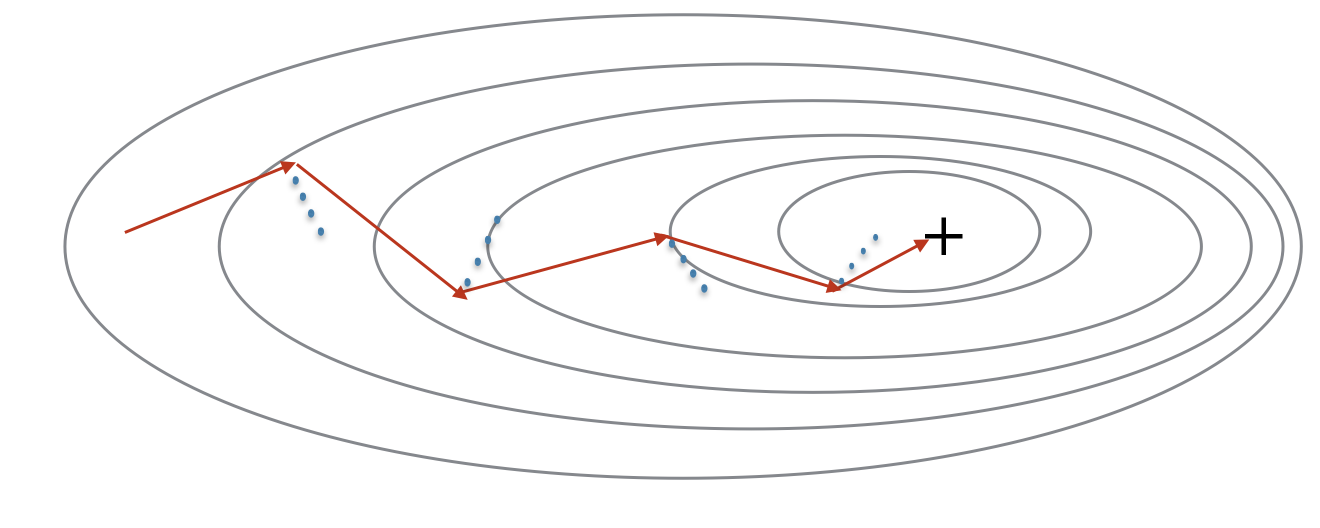

In [79]:
def update_parameters_with_momentum(parameters, grads, v, beta, learning_rate):
    """
    使用 Momentum 更新参数
    
     参数：
     parameters -- 包含您的参数的 python 字典：
                     参数['W' + str(l)] = Wl
                     参数['b' + str(l)] = bl
     grads——包含每个参数的渐变的 python 字典：
                     grads['dW' + str(l)] = dWl
                     grads['db' + str(l)] = dbl
     v -- 包含当前速度的 python 字典：
                     v['dW' + str(l)] = ...
                     v['db' + str(l)] = ...
     beta -- 动量超参数，标量
     learning_rate -- 学习率，标量
    
     退货：
     parameters -- 包含更新参数的 python 字典
     v -- 包含更新速度的 python 字典
    """

    L = len(parameters) // 2 # 计算神经网络的层数

    for i in range(L):

        # 计算权重参数的动量更新，使用指数加权平均来计算动量，beta是动量的衰减率，grads['dW' + str(i + 1)]是第i层的权重参数的梯度
        v['dW' + str(i + 1)] = beta * v['dW' + str(i + 1)] + (1 - beta) * grads['dW' + str(i + 1)]
        v['db' + str(i + 1)] = beta * v['db' + str(i + 1)] + (1 - beta) * grads['db' + str(i + 1)]
        # 根据动量更新权重参数：parameters['W' + str(i + 1)]是第i层的权重参数，通过减去学习率乘以权重参数的动量来更新权重参数的值
        parameters['W' + str(i + 1)] -= learning_rate * v['dW' + str(i + 1)]
        parameters['b' + str(i + 1)] -= learning_rate * v['db' + str(i + 1)]
        
    return parameters, v


In [80]:
# 生成测试用的参数parameters、梯度grads和动量v
parameters, grads, v = update_parameters_with_momentum_test_case()

# 使用带有动量的梯度下降算法更新参数
parameters, v = update_parameters_with_momentum(parameters, grads, v, beta=0.9, learning_rate=0.01)

# 打印更新后的参数
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

# 打印更新后的动量
print("v[\"dW1\"] = " + str(v["dW1"]))
print("v[\"db1\"] = " + str(v["db1"]))
print("v[\"dW2\"] = " + str(v["dW2"]))
print("v[\"db2\"] = " + str(v["db2"]))


W1 = [[ 1.62544598 -0.61290114 -0.52907334]
 [-1.07347112  0.86450677 -2.30085497]]
b1 = [[ 1.74493465]
 [-0.76027113]]
W2 = [[ 0.31930698 -0.24990073  1.4627996 ]
 [-2.05974396 -0.32173003 -0.38320915]
 [ 1.13444069 -1.0998786  -0.1713109 ]]
b2 = [[-0.87809283]
 [ 0.04055394]
 [ 0.58207317]]
v["dW1"] = [[-0.11006192  0.11447237  0.09015907]
 [ 0.05024943  0.09008559 -0.06837279]]
v["db1"] = [[-0.01228902]
 [-0.09357694]]
v["dW2"] = [[-0.02678881  0.05303555 -0.06916608]
 [-0.03967535 -0.06871727 -0.08452056]
 [-0.06712461 -0.00126646 -0.11173103]]
v["db2"] = [[0.02344157]
 [0.16598022]
 [0.07420442]]


In [81]:
def initialize_adam(parameters) :
    """
    将 v 和 s 初始化为两个 python 字典：
                 - 键：“dW1”、“db1”、...、“dWL”、“dbL”
                 - 值：与相应的梯度/参数形状相同的 numpy 零数组。
    
     参数：
     parameters -- 包含你的参数的 python 字典。
                     参数["W" + str(l)] = Wl
                     参数["b" + str(l)] = bl
    
     退货：
     v -- 将包含梯度的指数加权平均值的 python 字典。
                     v["dW" + str(l)] = ...
                     v["db" + str(l)] = ...
     s -- 将包含平方梯度的指数加权平均值的 python 字典。
                     s["dW" + str(l)] = ...
                     s["db" + str(l)] = ...

    """
    
    L = len(parameters) // 2 # 获取神经网络的层数

    # 初始化动量和RMSprop指数加权平均的字典
    v = {}
    s = {}
    
    for i in range(L):
        
        # 初始化权重参数的动量
        v["dW" + str(i + 1)] = np.zeros(parameters["W" + str(i + 1)].shape)
        # 初始化偏置参数的动量
        v["db" + str(i + 1)] = np.zeros(parameters["b" + str(i + 1)].shape)
        # 初始化权重参数的RMSprop指数加权平均
        s["dW" + str(i + 1)] = np.zeros(parameters["W" + str(i + 1)].shape)
        # 初始化偏置参数的RMSprop指数加权平均
        s["db" + str(i + 1)] = np.zeros(parameters["b" + str(i + 1)].shape)
    
    return v, s


In [82]:
# 生成测试用的参数
parameters = initialize_adam_test_case()

# 初始化Adam优化算法的动量和RMSprop指数加权平均
v, s = initialize_adam(parameters)

# 打印动量的值
print("v[\"dW1\"] = " + str(v["dW1"]))
print("v[\"db1\"] = " + str(v["db1"]))
print("v[\"dW2\"] = " + str(v["dW2"]))
print("v[\"db2\"] = " + str(v["db2"]))

# 打印RMSprop指数加权平均的值
print("s[\"dW1\"] = " + str(s["dW1"]))
print("s[\"db1\"] = " + str(s["db1"]))
print("s[\"dW2\"] = " + str(s["dW2"]))
print("s[\"db2\"] = " + str(s["db2"]))


v["dW1"] = [[0. 0. 0.]
 [0. 0. 0.]]
v["db1"] = [[0.]
 [0.]]
v["dW2"] = [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
v["db2"] = [[0.]
 [0.]
 [0.]]
s["dW1"] = [[0. 0. 0.]
 [0. 0. 0.]]
s["db1"] = [[0.]
 [0.]]
s["dW2"] = [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
s["db2"] = [[0.]
 [0.]
 [0.]]


In [83]:
# Adam优化算法的更新
def update_parameters_with_adam(parameters, grads, v, s, t, learning_rate = 0.01,
                                beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):
    """
    使用 Adam 更新参数
    
     参数：
     parameters -- 包含您的参数的 python 字典：
                     参数['W' + str(l)] = Wl
                     参数['b' + str(l)] = bl
     grads——包含每个参数的渐变的 python 字典：
                     grads['dW' + str(l)] = dWl
                     grads['db' + str(l)] = dbl
     v -- Adam 变量，第一个梯度的移动平均值，python 字典
     s -- Adam 变量，平方梯度的移动平均值，python 字典
     learning_rate -- 学习率，标量。
     beta1 -- 第一时刻估计的指数衰减超参数
     beta2——二次矩估计的指数衰减超参数
     epsilon -- 防止 Adam 更新中被零除的超参数

     退货：
     parameters -- 包含更新参数的 python 字典
     v -- Adam 变量，第一个梯度的移动平均值，python 字典
     s -- Adam 变量，平方梯度的移动平均值，python 字典
    """
    
    L = len(parameters) // 2                 # 神经网络中的层数
    v_corrected = {}                         # 初始化第一时刻估计的字典
    s_corrected = {}                         # 初始化第二时刻估计的字典

    # 对所有参数执行Adam更新
    for i in range(L):
        # 梯度的移动平均值
        v["dW" + str(i + 1)] = beta1 * v["dW" + str(i + 1)] + (1 - beta1) * grads["dW" + str(i + 1)]
        v["db" + str(i + 1)] = beta1 * v["db" + str(i + 1)] + (1 - beta1) * grads["db" + str(i + 1)]

        # 计算偏差校正的第一时刻估计
        v_corrected["dW" + str(i + 1)] = v["dW" + str(i + 1)] / (1 - beta1 ** t)
        v_corrected["db" + str(i + 1)] = v["db" + str(i + 1)] / (1 - beta1 ** t)
        
        # 梯度的平方的移动平均值
        s["dW" + str(i + 1)] = beta2 * s["dW" + str(i + 1)] + (1 - beta2) * np.multiply(grads["dW" + str(i + 1)], grads["dW" + str(i + 1)])
        s["db" + str(i + 1)] = beta2 * s["db" + str(i + 1)] + (1 - beta2) * np.multiply(grads["db" + str(i + 1)], grads["db" + str(i + 1)])
       
        # 计算偏差校正的第二时刻估计
        s_corrected["dW" + str(i + 1)] = s["dW" + str(i + 1)] / (1 - beta2 ** t)
        s_corrected["db" + str(i + 1)] = s["db" + str(i + 1)] / (1 - beta2 ** t)

        # 更新参数
        parameters["W" + str(i + 1)] -= learning_rate * v_corrected["dW" + str(i + 1)] / (epsilon + np.sqrt(s_corrected["dW" + str(i + 1)]))
        parameters["b" + str(i + 1)] -= learning_rate * v_corrected["db" + str(i + 1)] / (epsilon + np.sqrt(s_corrected["db" + str(i + 1)]))
        
    return parameters, v, s

In [84]:
parameters, grads, v, s = update_parameters_with_adam_test_case()

# 使用Adam优化算法更新参数、动量和RMSprop指数加权平均值
parameters, v, s = update_parameters_with_adam(parameters, grads, v, s, t=2)

# 打印更新后的参数和相关变量
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))
print("v[\"dW1\"] = " + str(v["dW1"]))
print("v[\"db1\"] = " + str(v["db1"]))
print("v[\"dW2\"] = " + str(v["dW2"]))
print("v[\"db2\"] = " + str(v["db2"]))
print("s[\"dW1\"] = " + str(s["dW1"]))
print("s[\"db1\"] = " + str(s["db1"]))
print("s[\"dW2\"] = " + str(s["dW2"]))
print("s[\"db2\"] = " + str(s["db2"]))

W1 = [[ 1.63178673 -0.61919778 -0.53561312]
 [-1.08040999  0.85796626 -2.29409733]]
b1 = [[ 1.75225313]
 [-0.75376553]]
W2 = [[ 0.32648046 -0.25681174  1.46954931]
 [-2.05269934 -0.31497584 -0.37661299]
 [ 1.14121081 -1.09244991 -0.16498684]]
b2 = [[-0.88529979]
 [ 0.03477238]
 [ 0.57537385]]
v["dW1"] = [[-0.11006192  0.11447237  0.09015907]
 [ 0.05024943  0.09008559 -0.06837279]]
v["db1"] = [[-0.01228902]
 [-0.09357694]]
v["dW2"] = [[-0.02678881  0.05303555 -0.06916608]
 [-0.03967535 -0.06871727 -0.08452056]
 [-0.06712461 -0.00126646 -0.11173103]]
v["db2"] = [[0.02344157]
 [0.16598022]
 [0.07420442]]
s["dW1"] = [[0.00121136 0.00131039 0.00081287]
 [0.0002525  0.00081154 0.00046748]]
s["db1"] = [[1.51020075e-05]
 [8.75664434e-04]]
s["dW2"] = [[7.17640232e-05 2.81276921e-04 4.78394595e-04]
 [1.57413361e-04 4.72206320e-04 7.14372576e-04]
 [4.50571368e-04 1.60392066e-07 1.24838242e-03]]
s["db2"] = [[5.49507194e-05]
 [2.75494327e-03]
 [5.50629536e-04]]


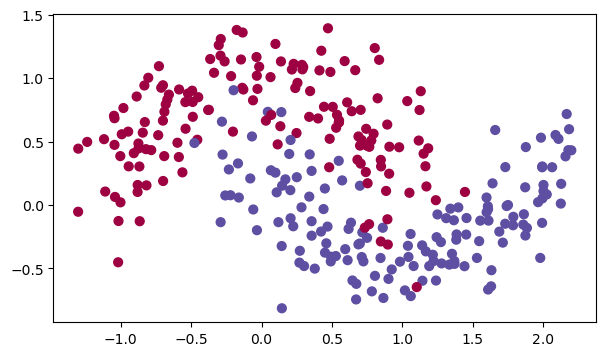

In [85]:
# 加载数据集
train_X, train_Y = load_dataset()

In [86]:
def model(X, Y, layers_dims, optimizer, learning_rate=0.0007, mini_batch_size=64, beta=0.9,
          beta1=0.9, beta2=0.999, epsilon=1e-8, num_epochs=10000, print_cost=True):
    """
    实现一个多层神经网络的模型

    参数:
    X -- 输入数据，维度为（输入特征数量，样本数量）
    Y -- 标签，维度为（输出特征数量，样本数量）
    layers_dims -- 包含每一层的神经元数量的列表
    optimizer -- 优化算法的选择，可选值为"gd"、"momentum"、"adam"
    learning_rate -- 学习率
    mini_batch_size -- 每个小批量的样本数量
    beta -- 动量法和Adam优化中的超参数
    beta1 -- Adam优化中的超参数，动量法的一阶矩估计的指数加权平均
    beta2 -- Adam优化中的超参数，动量法的二阶矩估计的指数加权平均
    epsilon -- Adam优化中的超参数，用于防止除零错误
    num_epochs -- 迭代次数
    print_cost -- 是否打印成本值

    返回:
    parameters -- 训练后的参数
    """

    L = len(layers_dims)             # 神经网络中的层数
    costs = []                       # 用于记录成本值
    t = 0                            # 用于Adam更新的计数器
    seed = 10                        # 为了保证结果可重复性，设定随机种子

    # 初始化参数
    parameters = initialize_parameters(layers_dims)

    # 初始化优化算法
    if optimizer == "gd":
        pass  # 梯度下降算法不需要初始化任何参数
    elif optimizer == "momentum":
        v = initialize_velocity(parameters)
    elif optimizer == "adam":
        v, s = initialize_adam(parameters)

    # 开始训练模型
    for i in range(num_epochs):

        # 定义成本值
        epoch_cost = 0

        # 定义随机小批量数据集，并在每个epoch之后重新洗牌数据集
        seed = seed + 1
        minibatches = random_mini_batches(X, Y, mini_batch_size, seed)

        # 遍历每个小批量数据集
        for minibatch in minibatches:

            # 选择一个小批量数据集
            (minibatch_X, minibatch_Y) = minibatch

            # 前向传播
            a3, caches = forward_propagation(minibatch_X, parameters)

            # 计算成本
            cost = compute_cost(a3, minibatch_Y)

            # 反向传播
            grads = backward_propagation(minibatch_X, minibatch_Y, caches)

            # 更新参数
            if optimizer == "gd":
                parameters = update_parameters_with_gd(parameters, grads, learning_rate)
            elif optimizer == "momentum":
                parameters, v = update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
            elif optimizer == "adam":
                t = t + 1  # Adam更新的计数器
                parameters, v, s = update_parameters_with_adam(parameters, grads, v, s, t, learning_rate, beta1, beta2,
                                                               epsilon)

            # 累计每个小批量的成本值
            epoch_cost += cost / mini_batch_size

        # 打印成本值
        if print_cost and i % 1000 == 0:
            print("Cost after epoch %i: %f" % (i, epoch_cost))
        if print_cost and i % 100 == 0:
            costs.append(epoch_cost)

    # 绘制成本曲线
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs (per 100)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()

    return parameters

In [87]:
def plot_decision_boundary(model, X, y):
    """
    绘制决策边界

    参数:
    model -- 训练好的模型
    X -- 输入特征
    y -- 标签
    """

    # 设置x和y的最小值和最大值，并留出一些空间
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1

    # 设置间距
    h = 0.01

    # 生成一个网格点的坐标
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # 对整个网格点进行预测
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 绘制等高线和训练样本点
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')

    # 重塑y的维度以匹配样本点的维度
    y = y.reshape(X[0, :].shape)

    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    plt.show()


Cost after epoch 0: 0.054818
Cost after epoch 1000: 0.052279
Cost after epoch 2000: 0.049689
Cost after epoch 3000: 0.047006
Cost after epoch 4000: 0.044810
Cost after epoch 5000: 0.043393
Cost after epoch 6000: 0.041577
Cost after epoch 7000: 0.039897
Cost after epoch 8000: 0.038636
Cost after epoch 9000: 0.036547


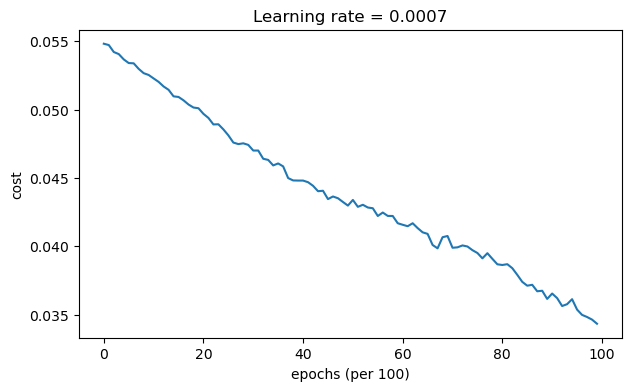

Accuracy: 0.7966666666666666


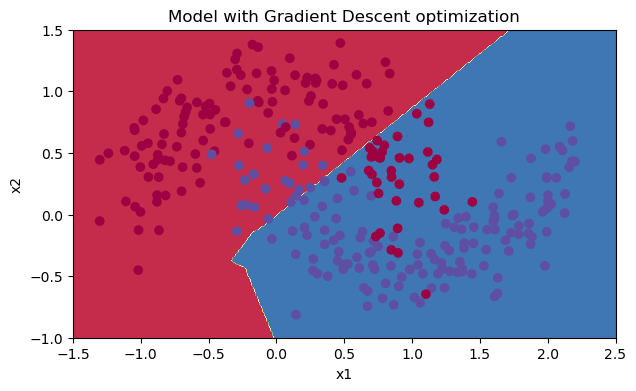

In [88]:
layers_dims = [train_X.shape[0], 5, 2, 1] # layers_dims: 定义了神经网络的层结构，包括输入层、隐藏层和输出层的神经元数量
parameters = model(train_X, train_Y, layers_dims, optimizer="gd")# 使用了梯度下降调用 model 函数进行模型训练，得到参数 parameters

# 进行预测
predictions = predict(train_X, train_Y, parameters)

# 绘制决策边界
plt.title("Model with Gradient Descent optimization")
axes = plt.gca()
axes.set_xlim([-1.5, 2.5])
axes.set_ylim([-1, 1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)


Cost after epoch 0: 0.054819
Cost after epoch 1000: 0.052284
Cost after epoch 2000: 0.049697
Cost after epoch 3000: 0.047014
Cost after epoch 4000: 0.044816
Cost after epoch 5000: 0.043399
Cost after epoch 6000: 0.041584
Cost after epoch 7000: 0.039905
Cost after epoch 8000: 0.038650
Cost after epoch 9000: 0.036558


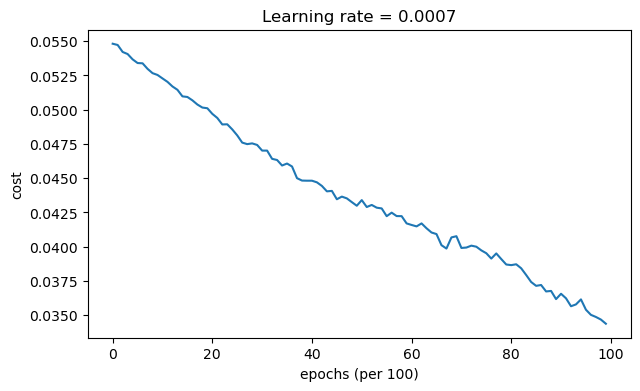

Accuracy: 0.7966666666666666


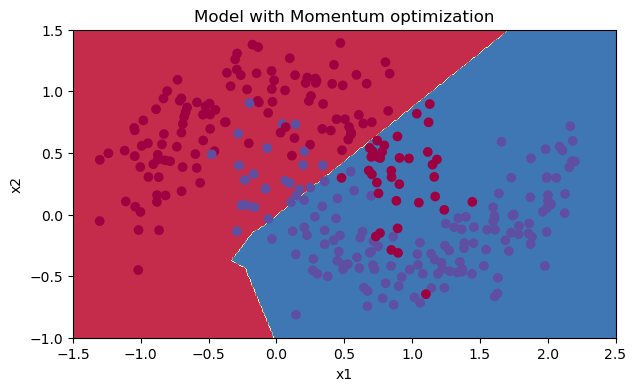

In [89]:
layers_dims = [train_X.shape[0], 5, 2, 1] # layers_dims: 定义了神经网络的层结构，包括输入层、隐藏层和输出层的神经元数量
parameters = model(train_X, train_Y, layers_dims, beta=0.9, optimizer="momentum") # 使用了动量优化调用model函数进行模型训练得到参数parameters

# 预测
predictions = predict(train_X, train_Y, parameters)

# 绘制决策边界图
plt.title("Model with Momentum optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)


Cost after epoch 0: 0.054800
Cost after epoch 1000: 0.013199
Cost after epoch 2000: 0.011087
Cost after epoch 3000: 0.010529
Cost after epoch 4000: 0.010581
Cost after epoch 5000: 0.010341
Cost after epoch 6000: 0.010095
Cost after epoch 7000: 0.009692
Cost after epoch 8000: 0.010039
Cost after epoch 9000: 0.010422


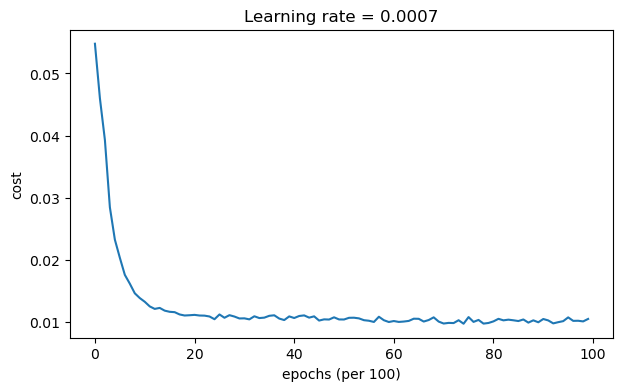

Accuracy: 0.94


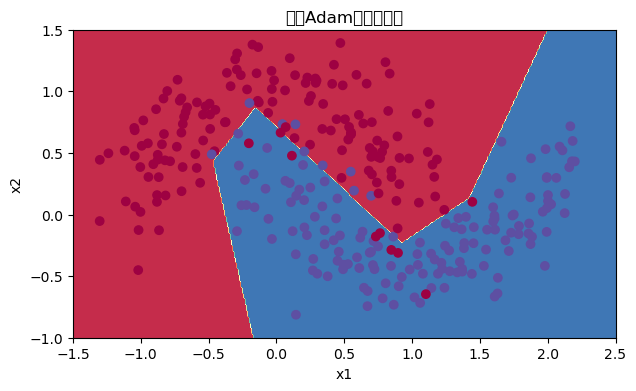

In [90]:
layers_dims = [train_X.shape[0], 5, 2, 1] # layers_dims: 定义了神经网络的层结构，包括输入层、隐藏层和输出层的神经元数量
parameters = model(train_X, train_Y, layers_dims, optimizer="adam") # 使用了adam优化调用model函数进行模型训练得到参数parameters

# 预测
predictions = predict(train_X, train_Y, parameters)

# 绘制决策边界图
plt.title("使用Adam优化的模型")
axes = plt.gca()
axes.set_xlim([-1.5, 2.5])
axes.set_ylim([-1, 1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)
